# Machine Learning - IN221 - February 2025
## Eng. Ahmed Métwalli
## Week 6 - Hands-on Modelling

- From Last Section:
    - We saved the un-normalized dataset using ML_DATA.to_csv("ML_DATA_V1")
- Now we will do the following:
    - Explanation about R2 Score in Linear Regression why it was used as metric?
        - R2 = 1 - SSR/STT > Where SSR is Sum Squared Regression (yi - yhati)^2 and STT is Total Sum of Squares (yi - ymean)^2
    - How to detect whether the model is in good fit or not using Cross-Validations

In [15]:
import warnings
warnings.filterwarnings('ignore') # 

### Load the latest version of the cleaned dataset

In [16]:
import pandas as pd

ML_DATA = pd.read_csv("ML_DATA_V1.csv") # import dataset
# Let's try only 2 features Active/DaysSinceStart
X = ML_DATA[['Active','DaysSinceStart']]#.drop(columns=['Deaths'])
y = ML_DATA['Deaths'] # output

### ML Problems: Underfitting & Overfitting!!?

<img src = "overfitting.png">

### Let's apply Cross-Validation to detect whether the model is good fit/robust or not.

<img src = "inside_cv.jpg">

## [View Section: Cross-Validation](SecWeek6_CV.pdf)

- Q&A?
    - Do you remember? Did we normalize the Deaths?
        - Of course not!!! Y is never normalized, only the input X
        - Hence we will normalize the dataset using Z-Score here again.

In [17]:
ML_DATA.columns

Index(['Confirmed', 'Active', 'Recovered', 'Deaths', 'DaysSinceStart'], dtype='object')

### Plot Data before Z-score

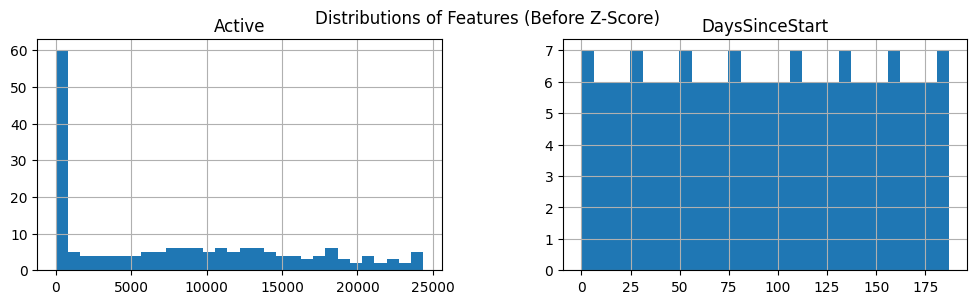

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# X dataframe
X.hist(bins=30, figsize=(12, 3))
plt.suptitle("Distributions of Features (Before Z-Score)")
plt.show()


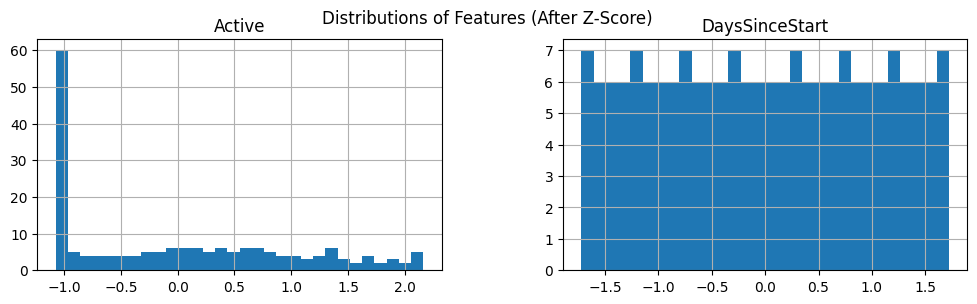

In [18]:
from sklearn.preprocessing import StandardScaler # Z-Score - class

# 3. Perform Z-Score normalization on the feature set
scaler = StandardScaler() # initializea
X_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns) # To dataframe
# Plot distributions of all features after Z-score normalization
X_norm.hist(bins=30, figsize=(12, 3))
plt.suptitle("Distributions of Features (After Z-Score)")
plt.show()

Q&A:

- What happened exactly?

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, cross_val_score


# Initialize a simple linear regression model (done)
model = LinearRegression()
# Fitting is delayed
# Define cross-validation strategies:
# a. KFold CV with 5 splits (shuffled)
kf = KFold(n_splits=5, # a must
           shuffle=True, # Not a must
           random_state=42) # try it once with shuffle and once without

# b. Leave-One-Out CV (LOOCV)
loo = LeaveOneOut() # only leaves one out so no number of splits!

# c. ShuffleSplit CV with 5 splits and 20% test size
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Evaluate with KFold CV using R2 as scoring metric
kf_scores = cross_val_score(model, X_norm, y, cv=kf, scoring='r2')
print("KFold CV R2 Scores:", kf_scores)
print("KFold Mean R2: {:.3f} ± {:.3f}".format(kf_scores.mean(), kf_scores.std()))

# Evaluate with Leave-One-Out CV
loo_scores = cross_val_score(model, X_norm, y, cv=loo, scoring='neg_mean_squared_error')
# print("All LOO scores are the following {}".format(loo_scores))
print("Leave-One-Out CV Negative Mean Squared Error: {:.3f}".format(loo_scores.mean())) # Average of the 1000
from numpy import sqrt

print("Leave-One-Out CV Root Mean Squared Error: {:.3f}".format(sqrt(-loo_scores.mean())))

# Evaluate with ShuffleSplit CV
ss_scores = cross_val_score(model, X_norm, y, cv=ss, scoring='r2')
print("ShuffleSplit CV R2 Scores:", ss_scores)
print("ShuffleSplit Mean R2: {:.3f} ± {:.3f}".format(ss_scores.mean(), ss_scores.std()))



KFold CV R2 Scores: [0.99465409 0.99323547 0.99195427 0.99507848 0.99299049]
KFold Mean R2: 0.994 ± 0.001
Leave-One-Out CV Negative Mean Squared Error: -4333.478
Leave-One-Out CV Root Mean Squared Error: 65.829
ShuffleSplit CV R2 Scores: [0.99465409 0.9931516  0.99661719 0.99262462 0.99243444]
ShuffleSplit Mean R2: 0.994 ± 0.002


- Documentation:
    - The data looks good since all CV R2 Scores are 1